### Case1 : $ X \sim Gamma(5,1) $

#### 1. Definition of PDF

In [4]:
%%file PDF_gamma.m

% PDF of Gamma(5,1)
function [res] = PDF_gamma(x)
    alpha=5;
    beta =1;
    res = (1/(gamma(alpha) * (beta^alpha))) * (x.^(alpha-1)) .* exp(- x./beta);
end

Created file '/Users/hyunwoogu/PDF_gamma.m'.


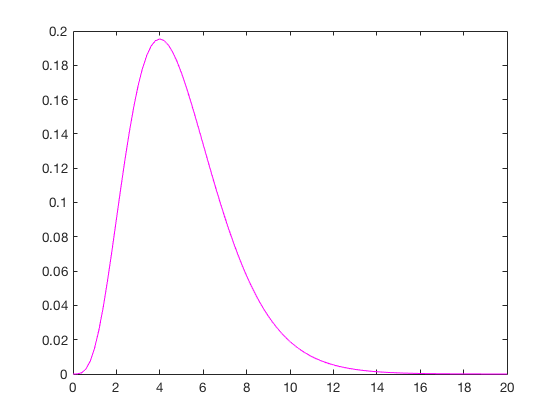

In [1]:
X = linspace(0, 20, 101);
Y = PDF_gamma(X);
plot(X,Y, '-magenta')

#### 2. Definition of a constraint

In [3]:
%%file constraint.m

function[c, ceq] = constraint(x)
    c   = x(1) - x(2);
    ceq = integral(@PDF_gamma, x(1), x(2)) - .95 ;
end

Created file '/Users/hyunwoogu/constraint.m'.


#### 3. Optimization

In [4]:
objective = @(x) x(2) - x(1);
x0 = [0 20]; % initial guess

A = [];
b = [];
Aeq = [];
beq = [];
lb = zeros(2);
ub = 20.0 * ones(1);
nonlincon = @constraint;

x = fmincon(objective, x0, A,b, Aeq, beq, lb, ub, nonlincon);
disp(x);

> In checkbounds (line 27)
  In fmincon (line 308)
> In checkbounds (line 47)
  In fmincon (line 308)

Local minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the default value of the optimality tolerance,
and constraints are satisfied to within the default value of the constraint tolerance.



    1.2070    9.4302



### Case2 : $ X \sim N(10,9) $

#### 1. Definition of PDF

In [15]:
%%file PDF_normal.m

% PDF of N(10,9)
function [res] = PDF_normal(x)
    mu   =10;
    sigma= 3;
    res = (1/(sqrt(2) * gamma(.5) * sigma)) * exp(-0.5 * ((x-mu)/sigma).^2);
end

Created file '/Users/hyunwoogu/PDF_normal.m'.


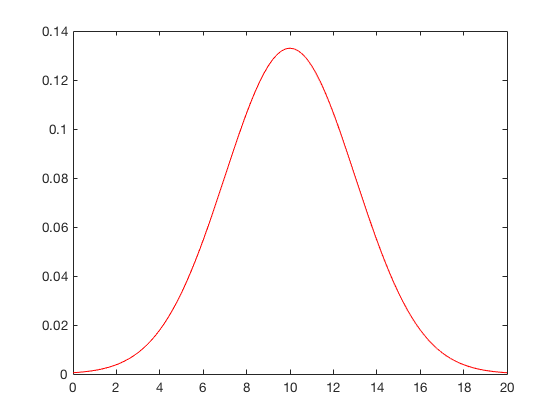

In [20]:
X = linspace(0, 20, 101);
Y = PDF_normal(X);
plot(X,Y, '-red')

#### 2. Definition of a Constraint

In [23]:
%%file constraint.m

function[c, ceq] = constraint(x)
    c   = x(1) - x(2);
    ceq = integral(@PDF_normal, x(1), x(2)) - .95 ;
end

Created file '/Users/hyunwoogu/constraint.m'.


#### 3. Optimization

Does not work...

In [34]:
objective = @(x) x(2) - x(1);
x0 = [4 16]; % initial guess

A = [];
b = [];
Aeq = [];
beq = [];
lb = zeros(2);
ub = 20.0 * ones(1);
nonlincon = @constraint;

x = fmincon(objective, x0, A,b, Aeq, beq, lb, ub, nonlincon);
disp(x);

> In checkbounds (line 27)
